In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
from pmdarima import auto_arima

In [6]:
PATH = "../Data/co2_mm_mlo.csv"

df = pd.read_csv(PATH)
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [7]:
df['date'] = pd.to_datetime({'year': df['year'], 'month': df['month'],
                             'day': 1})

In [8]:
df.head()

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          729 non-null    int64         
 1   month         729 non-null    int64         
 2   decimal_date  729 non-null    float64       
 3   average       722 non-null    float64       
 4   interpolated  729 non-null    float64       
 5   date          729 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.3 KB


In [10]:
df = df.set_index('date')

In [11]:
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


In [12]:
df.index.freq = 'MS'

In [13]:
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


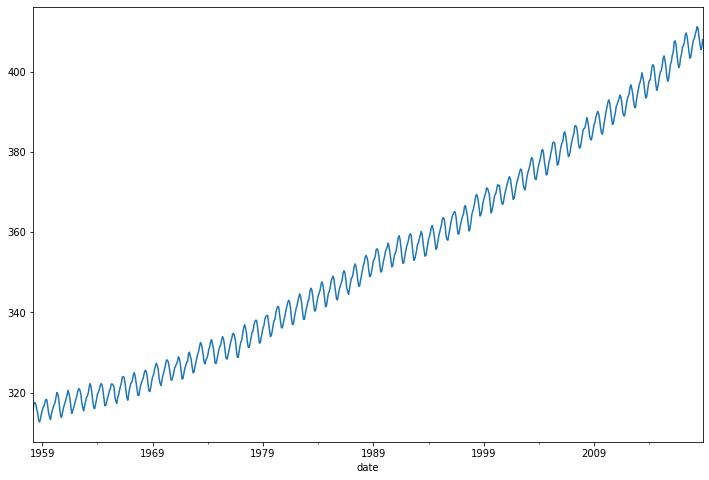

In [14]:
df['interpolated'].plot(figsize=(12,8))

In [15]:
result = seasonal_decompose(df['interpolated'], model='add')

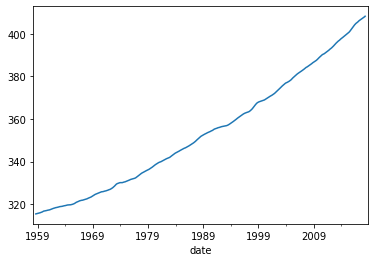

In [16]:
result.trend.plot();

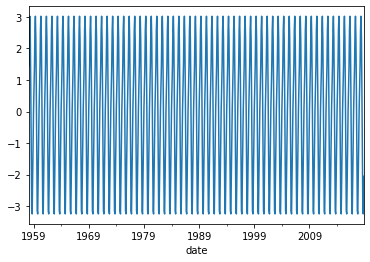

In [17]:
result.seasonal.plot();

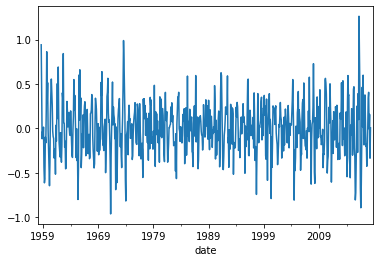

In [18]:
result.resid.plot();

In [19]:
auto_arima(df['interpolated'], seasonal=True, m=12).summary()

/Users/nathzi1505/Desktop/Private/Online-Courses/Time-Series/Course_Notebooks/venv/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/nathzi1505/Desktop/Private/Online-Courses/Time-Series/Course_Notebooks/venv/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/nathzi1505/Desktop/Private/Online-Courses/Time-Series/Course_Notebooks/venv/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/nathzi1505/Desktop/Private/Online-Courses/Time-Series/Course_Notebooks/venv/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likel

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -209.378
Date:                            Sun, 14 Jun 2020   AIC                            428.757
Time:                                    02:24:24   BIC                            451.708
Sample:                                         0   HQIC                           437.613
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.676e-05      0.000      0.298      0.766      -0.000       0.000
ma.L1         -0.3765      0.034    -10.989      0.000      -0.444      -0.309
ar.S.L12       0.9996      0.000   2989.014      0.000       0.999       1.000
ma.S.L12      -0.8628      0.022    -39.050      0.000      -0.906      -0.819
sigma2         0.0974      0.005     20.098      0.000       0.088       0.107
===================================================================================
Ljung-Box (Q):                       50.67   Jarque-Bera (JB):                 3.76
Prob(Q):                              0.12   Prob(JB):                         0.15
Heteroskedasticity (H):               1.12   Skew:                            -0.04
Prob(H) (two-sided):                  0.37   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
len(df)

729

In [21]:
train = df.iloc[:717]
test = df.iloc[717:]

In [22]:
model = SARIMAX(train['interpolated'], order=(0,1,1), seasonal_order=(1,0,1,12))

In [23]:
results = model.fit()

In [24]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -205.151
Date:                            Sun, 14 Jun 2020   AIC                            418.302
Time:                                    02:24:25   BIC                            436.597
Sample:                                03-01-1958   HQIC                           425.367
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3711      0.034    -10.791      0.000      -0.438      -0.304
ar.S.L12       0.9997      0.000   3100.164      0.000       0.999       1.000
ma.S.L12      -0.8641      0.023    -37.499      0.000      -0.909      -0.819
sigma2         0.0960      0.005     20.227      0.000       0.087       0.105
===================================================================================
Ljung-Box (Q):                       51.99   Jarque-Bera (JB):                 3.75
Prob(Q):                              0.10   Prob(JB):                         0.15
Heteroskedasticity (H):               1.13   Skew:                            -0.02
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
start = len(train)
end = len(train) + len(test) - 1

In [26]:
predictions = results.predict(start, end, typ='levels').rename('SARIMA Predictions')

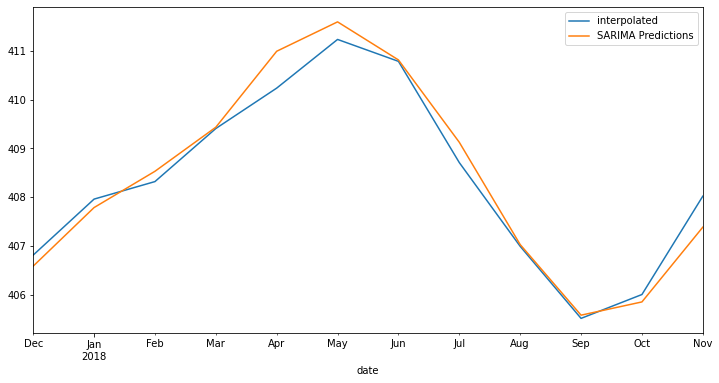

In [27]:
test['interpolated'].plot(legend=True, figsize=(12,6))
predictions.plot(legend=True)

In [28]:
from statsmodels.tools.eval_measures import rmse

In [29]:
error = rmse(test['interpolated'], predictions)

In [30]:
error

0.34628545044532594

In [31]:
test['interpolated'].mean()

408.3333333333333

In [32]:
model = SARIMAX(df['interpolated'], order=(0,1,1), seasonal_order=(1,0,1,12))

In [33]:
results = model.fit()

In [34]:
start = len(df)
end = len(df) + 11

forecast = predictions = results.predict(start, end, typ='levels').rename('SARIMA Forecast')

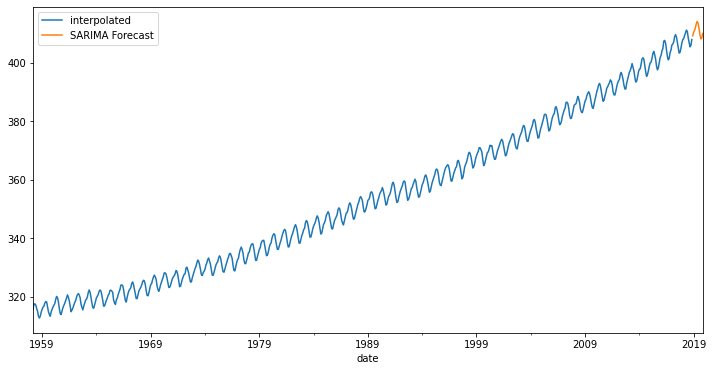

In [35]:
df['interpolated'].plot(legend=True, figsize=(12,6))
forecast.plot(legend=True)